# ECE239AS Project

#### Load the dataset

In [1]:
from useful.utils import *
from useful.CNN_RNN_v3 import *
import numpy as np
import h5py
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

train_loader, test_loader,val_loader = loader()(path='./project_datasets/A01T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

/Users/shuangyu/anaconda3/envs/pytorch/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (187, 22, 1000)
Train labels shape:  (187,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)


# CNN+ LSTM

In [3]:
import torch.autograd as autograd
import matplotlib.pyplot as plt

criteria = F.cross_entropy

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
    

def test(test_loader=val_loader, mode = 'val'):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target).long()
        output = model(data)
        test_loss += criteria(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

def main_train(epoches = 10):
    stats = {}
    stats['train'] = []
    stats['val']  = []
    stats['test']  = []

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch)
        stats['train'].append(test(train_loader, mode='train'))
        stats['val'].append(test(val_loader, mode='val'))       
        stats['test'].append(test(test_loader, mode = 'val'))

    

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])
    stats['test'] = np.array(stats['test'])
    print("Best test acc is :")
    print(np.amax(stats['test'][:,1]))

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

### subject 1

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (187, 22, 1000)
Train labels shape:  (187,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/187 (0%)]	Loss: 1.383709
Train Epoch: 0 [100/187 (50%)]	Loss: 1.385183
train loss: 1.3862, Accuracy: 47/187 (25%)
validation loss: 1.3864, Accuracy: 13/50 (26%)

validation loss: 1.3869, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/187 (0%)]	Loss: 1.381798
Train Epoch: 1 [100/187 (50%)]	Loss: 1.385381
train loss: 1.3856, Accuracy: 47/187 (25%)
validation loss: 1.3865, Accuracy: 12/50 (24%)

validation loss: 1.3865, Accuracy: 12/50 (24%)

Train Epoch: 2 [0/187 (0%)]	Loss: 1.378296
Train Epoch: 2 [100/187 (50%)]	Loss: 1.367570
train loss: 1.3759, Accuracy: 75/187 (40%)
validation loss: 1.3801, Accuracy: 17/50 (34%)

validation loss: 1.3817, Accuracy: 16/50 (32%)

Train Epoch: 3 [0/187 (0%)]	Loss: 1.368118
Tr

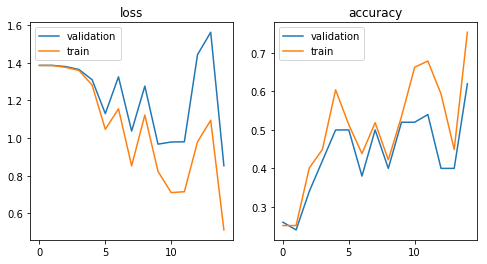

In [3]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A01T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 2

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
Train data shape:  (186, 22, 1000)
Train labels shape:  (186,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/186 (0%)]	Loss: 1.356744
Train Epoch: 0 [100/186 (50%)]	Loss: 1.401539
train loss: 1.3871, Accuracy: 47/186 (25%)
validation loss: 1.3905, Accuracy: 12/50 (24%)

validation loss: 1.3871, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/186 (0%)]	Loss: 1.374633
Train Epoch: 1 [100/186 (50%)]	Loss: 1.374408
train loss: 1.3522, Accuracy: 71/186 (38%)
validation loss: 1.3855, Accuracy: 12/50 (24%)

validation loss: 1.3821, Accuracy: 11/50 (22%)

Train Epoch: 2 [0/186 (0%)]	Loss: 1.308362
Train Epoch: 2 [100/186 (50%)]	Loss: 1.327147
train loss: 1.2705, Accuracy: 108/186 (58%)
validation loss: 1.3943, Accuracy: 12/50 (24%)

validation loss: 1.3867, Accuracy: 14/50 (28%)

Train 

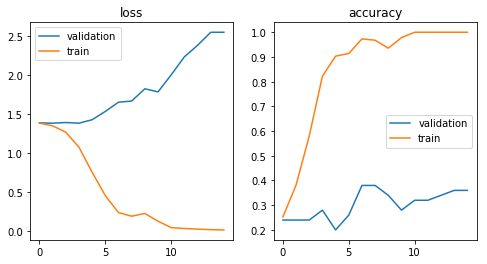

In [4]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A02T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 3

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
Train data shape:  (186, 22, 1000)
Train labels shape:  (186,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/186 (0%)]	Loss: 1.432823
Train Epoch: 0 [100/186 (50%)]	Loss: 1.372806
train loss: 1.3886, Accuracy: 46/186 (25%)
validation loss: 1.3873, Accuracy: 13/50 (26%)

validation loss: 1.3895, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/186 (0%)]	Loss: 1.374537
Train Epoch: 1 [100/186 (50%)]	Loss: 1.332622
train loss: 1.3689, Accuracy: 53/186 (28%)
validation loss: 1.3774, Accuracy: 14/50 (28%)

validation loss: 1.3830, Accuracy: 15/50 (30%)

Train Epoch: 2 [0/186 (0%)]	Loss: 1.351276
Train Epoch: 2 [100/186 (50%)]	Loss: 1.308206
train loss: 1.3298, Accuracy: 60/186 (32%)
validation loss: 1.3734, Accuracy: 13/50 (26%)

validation loss: 1.3750, Accuracy: 13/50 (26%)

Train E

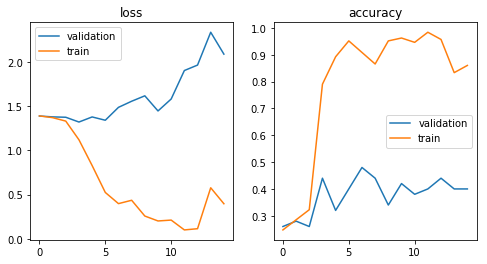

In [5]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A03T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject4

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
Train data shape:  (184, 22, 1000)
Train labels shape:  (184,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/184 (0%)]	Loss: 1.370345
Train Epoch: 0 [100/184 (50%)]	Loss: 1.378799
train loss: 1.3907, Accuracy: 46/184 (25%)
validation loss: 1.3906, Accuracy: 13/50 (26%)

validation loss: 1.3891, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/184 (0%)]	Loss: 1.383876
Train Epoch: 1 [100/184 (50%)]	Loss: 1.401868
train loss: 1.3886, Accuracy: 46/184 (25%)
validation loss: 1.3888, Accuracy: 13/50 (26%)

validation loss: 1.3875, Accuracy: 13/50 (26%)

Train Epoch: 2 [0/184 (0%)]	Loss: 1.369663
Train Epoch: 2 [100/184 (50%)]	Loss: 1.359260
train loss: 1.3872, Accuracy: 46/184 (25%)
validation loss: 1.3875, Accu

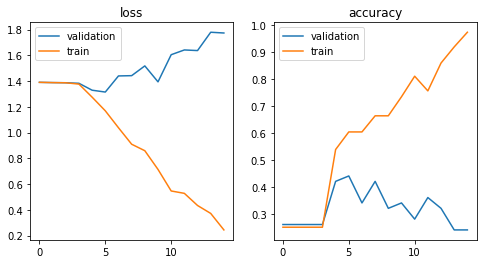

In [6]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A04T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject5

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
Train data shape:  (182, 22, 1000)
Train labels shape:  (182,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/182 (0%)]	Loss: 1.391355
Train Epoch: 0 [100/182 (50%)]	Loss: 1.387773
train loss: 1.3863, Accuracy: 47/182 (26%)
validation loss: 1.3872, Accuracy: 12/50 (24%)

validation loss: 1.3864, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/182 (0%)]	Loss: 1.382812
Train Epoch: 1 [100/182 (50%)]	Loss: 1.373636
train loss: 1.3820, Accuracy: 50/182 (27%)
validation loss: 1.3854, Accuracy: 13/50 (26%)

validation loss: 1.3856, Accuracy: 13/50 (26%)

Train Epoch: 2 [0/182 (0%)]	Loss: 1.375001
Train Epoch: 2 [100/182 (50%)]	Loss: 1.363651
tr

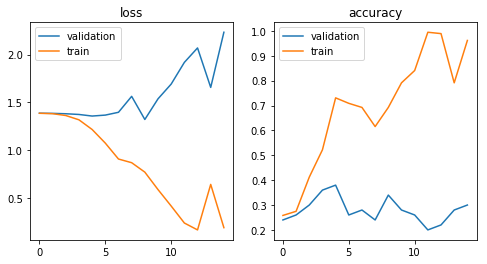

In [7]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A05T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 6

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
Train data shape:  (185, 22, 1000)
Train labels shape:  (185,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/185 (0%)]	Loss: 1.384136
Train Epoch: 0 [100/185 (50%)]	Loss: 1.392831
train loss: 1.3902, Accuracy: 46/185 (25%)
validation loss: 1.3895, Accuracy: 13/50 (26%)

validation loss: 1.3897, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/185 (0%)]	Loss: 1.382500
Train Epoch: 1 [100/185 (50%)]	Loss: 1.374288
train loss: 1.3861, Accuracy: 46/185 (25%)
validation loss: 1.3948, Accuracy: 13/50 (26%)

validation loss: 1.3939, Accuracy: 13/50 (26%)

Train Epoch: 2 [0/185 (0%)]	Loss: 1.315476
Train Epoch: 2 [100/185 (50%)]	Loss: 1.283727
train loss: 1.2938, Accuracy: 72/185 (39%)
validation loss: 1.3680, Accuracy: 14/50 (28%)

validation loss: 1.

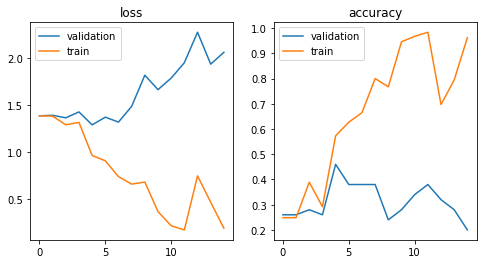

In [8]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A06T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 7

X_shape (288, 22, 1000)
y_shape (1, 1000)
Train data shape:  (188, 22, 1000)
Train labels shape:  (188,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/188 (0%)]	Loss: 1.375461
Train Epoch: 0 [100/188 (50%)]	Loss: 1.388740
train loss: 1.3887, Accuracy: 47/188 (25%)
validation loss: 1.3908, Accuracy: 12/50 (24%)

validation loss: 1.3868, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/188 (0%)]	Loss: 1.358777
Train Epoch: 1 [100/188 (50%)]	Loss: 1.310058
train loss: 1.3792, Accuracy: 47/188 (25%)
validation loss: 1.3867, Accuracy: 12/50 (24%)

validation loss: 1.3800, Accuracy: 13/50 (26%)

Train Epoch: 2 [0/188 (0%)]	Loss: 1.260359
Train Epoch: 2 [100/188 (50%)]	Loss: 1.194218
train loss: 1.3112, Accuracy: 66/188 (35%)
validation loss: 1.3461, Accuracy: 16/50 (32%)

validation loss: 1.3412, Accuracy: 14/50 (28%)

Train Epoch: 3 [0/188 (0%)]	Loss: 1.106749
Train Epoch: 3 [100/188 (50%)]	Loss: 1

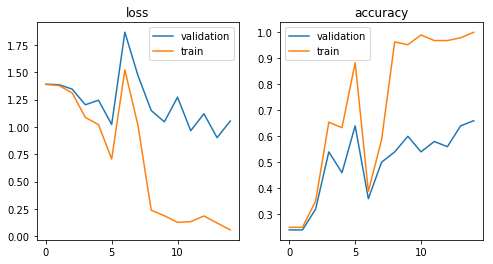

In [9]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A07T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 8

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
Train data shape:  (182, 22, 1000)
Train labels shape:  (182,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/182 (0%)]	Loss: 1.386453
Train Epoch: 0 [100/182 (50%)]	Loss: 1.398238
train loss: 1.3874, Accuracy: 46/182 (25%)
validation loss: 1.3860, Accuracy: 13/50 (26%)

validation loss: 1.3872, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/182 (0%)]	Loss: 1.397077
Train Epoch: 1 [100/182 (50%)]	Loss: 1.396481
train loss: 1.3873, Accuracy: 46/182 (25%)
validation loss: 1.3861, Accuracy: 13/50 (26%)

validation loss: 1.3870, Accuracy: 13/50 (26%)

Train Epoch: 2 [0/182 (0%)]	Loss: 1.385781
Train Epoch: 2 [100/182 (50%)]	Loss: 1.384856


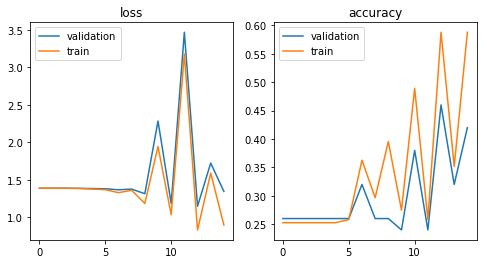

In [10]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A08T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 09

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 22,and be deleted
nan exists on row 61,and be deleted
nan exists on row 92,and be deleted
nan exists on row 93,and be deleted
nan exists on row 159,and be deleted
nan exists on row 202,and be deleted
nan exists on row 204,and be deleted
nan exists on row 218,and be deleted
nan exists on row 239,and be deleted
nan exists on row 250,and be deleted
Train data shape:  (178, 22, 1000)
Train labels shape:  (178,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/178 (0%)]	Loss: 1.381231
Train Epoch: 0 [100/178 (56%)]	Loss: 1.388268
train loss: 1.3878, Accuracy: 45/178 (25%)
validation loss: 1.3858, Accuracy: 13/50 (26%)

validation loss: 1.3883, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/178 (0%)]	Loss: 1.365557
Train Epoch: 1 [100/178 (56%)]	Loss: 1.384492
train loss: 1.3832, Accuracy: 67/178 (38%)
validation loss: 1.3850, Accuracy: 15/5

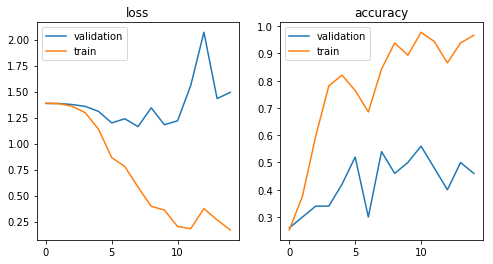

In [11]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A09T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### wholeset

nan exists on row 56,and be deleted
(287, 22, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
(286, 22, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
(286, 22, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
(284, 22, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
(282, 22, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
(285, 22, 1000)
(288, 22, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
(282, 22

Train Epoch: 8 [1500/1838 (81%)]	Loss: 0.986182
Train Epoch: 8 [1650/1838 (89%)]	Loss: 1.003870
Train Epoch: 8 [1800/1838 (97%)]	Loss: 1.114233
train loss: 0.9071, Accuracy: 1152/1838 (63%)
validation loss: 1.1701, Accuracy: 139/270 (51%)

validation loss: 1.2519, Accuracy: 206/450 (46%)

Train Epoch: 9 [0/1838 (0%)]	Loss: 0.729393
Train Epoch: 9 [150/1838 (8%)]	Loss: 1.041349
Train Epoch: 9 [300/1838 (16%)]	Loss: 1.069563
Train Epoch: 9 [450/1838 (24%)]	Loss: 0.715222
Train Epoch: 9 [600/1838 (32%)]	Loss: 0.751756
Train Epoch: 9 [750/1838 (40%)]	Loss: 0.993122
Train Epoch: 9 [900/1838 (48%)]	Loss: 1.070492
Train Epoch: 9 [1050/1838 (56%)]	Loss: 0.931883
Train Epoch: 9 [1200/1838 (65%)]	Loss: 0.642925
Train Epoch: 9 [1350/1838 (73%)]	Loss: 1.112951
Train Epoch: 9 [1500/1838 (81%)]	Loss: 0.800288
Train Epoch: 9 [1650/1838 (89%)]	Loss: 1.008216
Train Epoch: 9 [1800/1838 (97%)]	Loss: 1.176253
train loss: 0.8131, Accuracy: 1237/1838 (67%)
validation loss: 1.1899, Accuracy: 135/270 (50%)

v

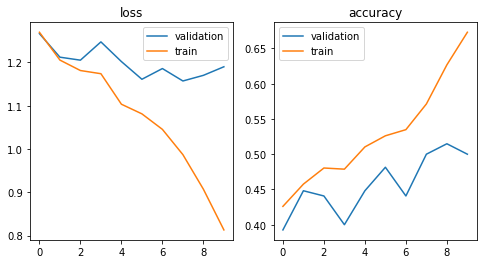

In [4]:
l = loader()
l.batch_size = 30
l.getAllDataSubject(num_test = 50,num_validation = 30)
train_loader = l.train_loader
test_loader = l.test_loader
val_loader = l.val_loader
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = RNN_LSTM()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(l.test_loaders[i], mode = 'val')